# Explore LHC dataset

In [25]:
%matplotlib inline

import sys
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import corner
import logging
from sklearn.manifold import TSNE

logging.basicConfig(
    format="%(asctime)-5.5s %(name)-30.30s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.INFO,
)

sys.path.append("../../")
from experiments.simulators.collider import WBFLoader


## Analyze data

In [31]:
n = 10000

In [32]:
sim = WBFLoader()
sim.latent_dim()

14

In [33]:
x, params = sim.load_dataset(train=True, dataset_dir="../data/samples/lhc", numpy=True, limit_samplesize=n)

12:25 experiments.simulators.collide INFO    Only using 10000 of 1000000 available samples
12:25 experiments.simulators.collide INFO    Scaling LHC data to zero mean and unit variance


In [35]:
x_ = sim._preprocess(x, inverse=True)

12:26 experiments.simulators.collide INFO    Scaling LHC data back to conventional normalization


## Viz

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000).fit_transform(x)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.039s...
[t-SNE] Computed neighbors for 10000 samples in 14.291s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.856963
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.986702


In [ ]:
plt.figure(figsize=(5, 5))

plt.scatter(
    tsne[:, 0],
    tsne[:, 1],
    s=12.0,
    alpha=0.15,
    c="C3"
)

plt.xlabel("t-SNE component 0")
plt.ylabel("t-SNE component 1")

plt.tight_layout()
plt.savefig("../figures/lhc_tsne.pdf")

## Closure test vs noise

In [18]:
sim.distance_from_manifold(x)

12:20 experiments.simulators.collide INFO    Scaling LHC data back to conventional normalization


0.00018370548612127137

In [19]:
noises = np.geomspace(1.e-9, 1., 100)

closure = []

for noise in noises:
    closure.append(sim.distance_from_manifold(x + noise * np.random.normal(size=x.shape)))

12:20 experiments.simulators.collide INFO    Scaling LHC data back to conventional normalization
12:20 experiments.simulators.collide INFO    Scaling LHC data back to conventional normalization
12:20 experiments.simulators.collide INFO    Scaling LHC data back to conventional normalization
12:20 experiments.simulators.collide INFO    Scaling LHC data back to conventional normalization
12:20 experiments.simulators.collide INFO    Scaling LHC data back to conventional normalization
12:20 experiments.simulators.collide INFO    Scaling LHC data back to conventional normalization
12:20 experiments.simulators.collide INFO    Scaling LHC data back to conventional normalization
12:20 experiments.simulators.collide INFO    Scaling LHC data back to conventional normalization
12:20 experiments.simulators.collide INFO    Scaling LHC data back to conventional normalization
12:20 experiments.simulators.collide INFO    Scaling LHC data back to conventional normalization
12:20 experiments.simulators.c

12:20 experiments.simulators.collide INFO    Scaling LHC data back to conventional normalization
12:20 experiments.simulators.collide INFO    Scaling LHC data back to conventional normalization
12:20 experiments.simulators.collide INFO    Scaling LHC data back to conventional normalization
12:20 experiments.simulators.collide INFO    Scaling LHC data back to conventional normalization
12:20 experiments.simulators.collide INFO    Scaling LHC data back to conventional normalization
12:20 experiments.simulators.collide INFO    Scaling LHC data back to conventional normalization
12:20 experiments.simulators.collide INFO    Scaling LHC data back to conventional normalization
12:20 experiments.simulators.collide INFO    Scaling LHC data back to conventional normalization
12:20 experiments.simulators.collide INFO    Scaling LHC data back to conventional normalization
12:20 experiments.simulators.collide INFO    Scaling LHC data back to conventional normalization
12:20 experiments.simulators.c

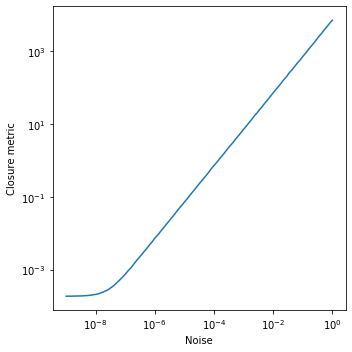

In [23]:
plt.figure(figsize=(5,5))

plt.plot(noises, closure)

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Noise")
plt.ylabel("Closure metric")

plt.tight_layout()
plt.savefig("../figures/lhc_closure_vs_noise.pdf")


In [21]:
# pT vs px, py
print("pT")
print(sim._pt_discrepancy(x_, 4, 1, 2))
print(sim._pt_discrepancy(x_, 11, 8, 9))
print(sim._pt_discrepancy(x_, 18, 15, 16))
print(sim._pt_discrepancy(x_, 25, 22, 23))
print(sim._pt_discrepancy(x_, 32, 29, 30))
print(sim._pt_discrepancy(x_, 42, 39, 40))

# phi vs px, py
print("phi")
print(sim._phi_discrepancy(x_, 6, 1, 2))
print(sim._phi_discrepancy(x_, 13, 8, 9))
print(sim._phi_discrepancy(x_, 20, 15, 16))
print(sim._phi_discrepancy(x_, 27, 22, 23))
print(sim._phi_discrepancy(x_, 35, 29, 30))
print(sim._phi_discrepancy(x_, 45, 39, 40))

# eta vs E, px, py, pz
print("eta")
print(sim._eta_discrepancy(x_, 5, 0, 1, 2, 3))
print(sim._eta_discrepancy(x_, 12, 7, 8, 9, 10))
print(sim._eta_discrepancy(x_, 19, 14, 15, 16, 17))
print(sim._eta_discrepancy(x_, 26, 21, 22, 23, 24))
print(sim._eta_discrepancy(x_, 34, 28, 29, 30, 31))
print(sim._eta_discrepancy(x_, 44, 38, 39, 40, 41))

# E vs on-shell and m vs on-shell
print("E")
print(sim._on_shell_discrepancy(x_, 0, 1, 2, 3))
print(sim._on_shell_discrepancy(x_, 7, 8, 9, 10))
print(sim._on_shell_discrepancy(x_, 28, 29, 30, 31, m=x[:, 33]))
print(sim._on_shell_discrepancy(x_, 38, 39, 40, 41, m=x[:, 43]))

# reconstructed particles vs daughters
print("particle sum")
for add in [0, 1, 2, 3]:
    print(sim._daughter_discrepancy(x_, 28 + add, 0 + add, 7 + add))
    print(sim._daughter_discrepancy(x_, 38 + add, 14 + add, 21 + add))

# delta something discrepancies
print("particle delta")
print(sim._delta_discrepancy(x_, 36, 5, 12))
print(sim._delta_discrepancy(x_, 37, 6, 13))
print(sim._delta_discrepancy(x_, 46, 19, 26))
print(sim._delta_discrepancy(x_, 47, 20, 27))

pT
4.031331438270058e-06
1.2720772707606186e-06
4.0648736094226475e-06
1.9068806075956956e-06
7.601364374858477e-06
7.011951904935643e-06
phi
9.165175303866473e-09
8.996366318955306e-09
9.92857474564797e-09
8.796107831039388e-09
3.745610018733407e-08
3.5137610659333836e-08
eta
1.648474136379998e-08
1.667615080864815e-08
1.9918569693517466e-08
2.179120023045153e-08
2.6933632313810126e-08
4.151394197173669e-08
E
1.5572530641506433e-05
5.22851286031667e-06
27.874336357951986
416.7354069014843
particle sum
1.0342597962051058e-05
3.204536438249761e-05
4.559149034671029e-06
4.929363728371217e-06
4.547283053397633e-06
4.794757814041928e-06
8.75759869914039e-06
2.3999743164205832e-05
particle delta
1.1228548846821569e-08
2.7185247763548276e-08
6.14870805498019e-08
4.080426880768333e-08
